## AT1C - Experiment on multivariate linear regression with feature engineering or with any algorithms of your choice.

In [1]:
# importing pandas library to read and modify the dataset
import pandas as pd
# Do not want to print the warning, so ignoring them
import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading train and test file of the cancer mortality dataset
cancer_data_train = pd.read_csv("cancer_us_county-training.csv")
cancer_data_test = pd.read_csv("cancer_us_county-testing.csv")

In [3]:
# Dropping Id as it is of no use
cancer_data_train = cancer_data_train.drop(columns=["Id"])
cancer_data_test = cancer_data_test.drop(columns=["Id"])

### Handling missing values as discussed in Part B

In [4]:
# PctSomeCol18_24 should be eliminated as seen in Part A
cancer_data_train = cancer_data_train.drop('PctSomeCol18_24',axis=1)
cancer_data_test = cancer_data_test.drop('PctSomeCol18_24',axis=1)

#PctPrivateCoverageAlone has no skew and is normally distributed - can replace null with mean
mean_val = cancer_data_train['PctPrivateCoverageAlone'].mean()
cancer_data_train['PctPrivateCoverageAlone'] = cancer_data_train['PctPrivateCoverageAlone'].fillna(mean_val)
cancer_data_test['PctPrivateCoverageAlone'] = cancer_data_test['PctPrivateCoverageAlone'].fillna(mean_val)

#PctEmployed16_Over has outliers and is left skewed - replace null by median
median_val = cancer_data_train['PctEmployed16_Over'].median()
cancer_data_train['PctEmployed16_Over'] = cancer_data_train['PctEmployed16_Over'].fillna(median_val)
cancer_data_test['PctEmployed16_Over'] = cancer_data_test['PctEmployed16_Over'].fillna(median_val)

### Plotting scatter plots for each variable against the target death rate to analyse the relationship between them

In [5]:
# importing math, numpy, matplotlib and seaborn libraries
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# num_data has all the nuerical columns 
num_data = cancer_data_train.select_dtypes(include=np.number) 

# fix axes to subplot the scatter plots
fig, ax = plt.subplots(nrows=10, ncols=3, figsize=(20, 40))

# pop the target variable to plot each variable against it 
target = num_data.pop("TARGET_deathRate")

#loop through each column and plot the scatter plot
for index, cols in enumerate(num_data.columns.values):
    sns.scatterplot(data = num_data,  y = target , x = cols , ax = ax[math.floor(index/3)][index%3])
plt.show()

### A few Visual Analyses:

1. The target death rate tends to decline curvilinearly as median income rises.
2. With regard to povertyPercent, the target death rate rises (slightly) linearly.
3. The county's population and the desired death rate do not appear to be correlated in any concrete manner.
4. Death rates and the proportion of people over 25 who hold a bachelor's degree have a curvilinear relationship that is falling.
5. A reduced death rate appears to be experienced by those with PctPrivateCoverageAlone whereas people with Public Coverage have increased death rate

### Feature engineering 
#### 1. Correlation matrix using seabron Heatmap

<Axes: >

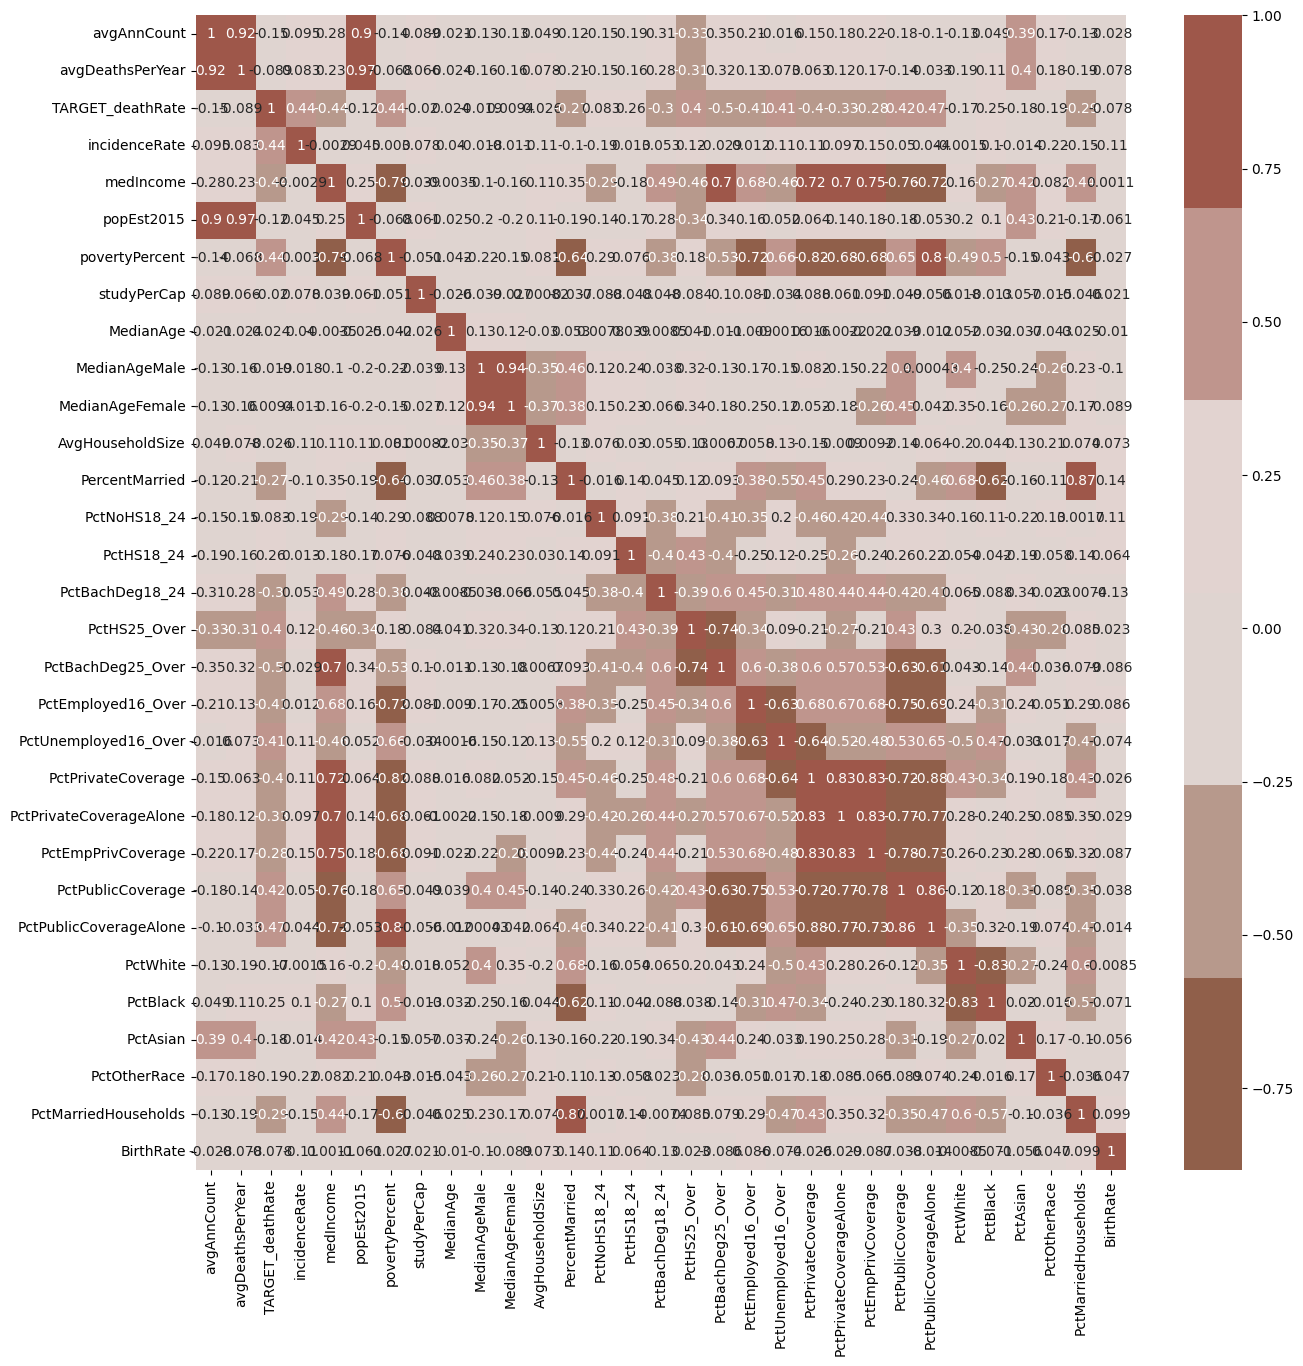

In [12]:
# making a color map object using divering palette providing HUSL colors
cmap = sns.diverging_palette(h_neg=30, h_pos=20, s=50, l=45)
# fixing figure size 
plt.figure(figsize=(15,15))
# plotting heatmap of train set
sns.heatmap(cancer_data_train.corr(),cmap=cmap,annot=True)

We need to look for the 3rd row as it represents target death rate. As there are many variables with low correlation scores, we will put a threshold of 0.27 and eliminate features below this threshold value from the dataframe.

In [13]:
# Only considering columns with high correlation - train set
cancer_train_df_clean1 = cancer_data_train[['incidenceRate', 'medIncome', 'povertyPercent', 
           'PercentMarried', 'PctBachDeg18_24', 'PctHS25_Over', 'PctBachDeg25_Over', "PctEmployed16_Over", 
            "PctUnemployed16_Over", "PctPrivateCoverage", "PctPrivateCoverageAlone", "PctEmpPrivCoverage",
            "PctPublicCoverage", "PctPublicCoverageAlone", "PctMarriedHouseholds", 'TARGET_deathRate']]

In [14]:
cancer_train_df_clean1.shape

(2438, 16)

In [15]:
cancer_train_df_clean1.head()

,incidenceRate,medIncome,povertyPercent,PercentMarried,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctMarriedHouseholds,TARGET_deathRate
0,561.400000,29090,26.8,59.2,3.5,43.4,4.3,37.3,12.3,44.8,33.6,32.0,47.5,32.9,55.499459,261.0
1,345.600000,29782,38.8,44.3,0.5,35.5,6.4,31.7,11.5,27.2,20.7,18.8,45.3,34.1,52.818296,167.3
2,468.400000,41955,15.5,48.2,6.4,43.5,10.2,48.5,10.6,67.4,49.6,44.9,34.5,16.0,50.560800,191.0
3,453.549422,55378,11.1,54.2,6.2,32.5,10.6,57.1,5.8,70.9,56.8,49.6,30.1,15.2,52.565181,165.4
4,349.700000,26309,35.3,30.2,4.0,40.6,5.9,28.6,14.6,54.8,37.8,30.4,45.1,24.5,33.641208,160.6


In [10]:
# similarly for the test set
cancer_test_df_clean = cancer_data_test[['incidenceRate', 'medIncome', 'povertyPercent', 
           'PercentMarried', 'PctBachDeg18_24', 'PctHS25_Over', 'PctBachDeg25_Over', "PctEmployed16_Over", 
            "PctUnemployed16_Over", "PctPrivateCoverage", "PctPrivateCoverageAlone", "PctEmpPrivCoverage",
            "PctPublicCoverage", "PctPublicCoverageAlone", "PctMarriedHouseholds", 'TARGET_deathRate']]

### Check for any outliers

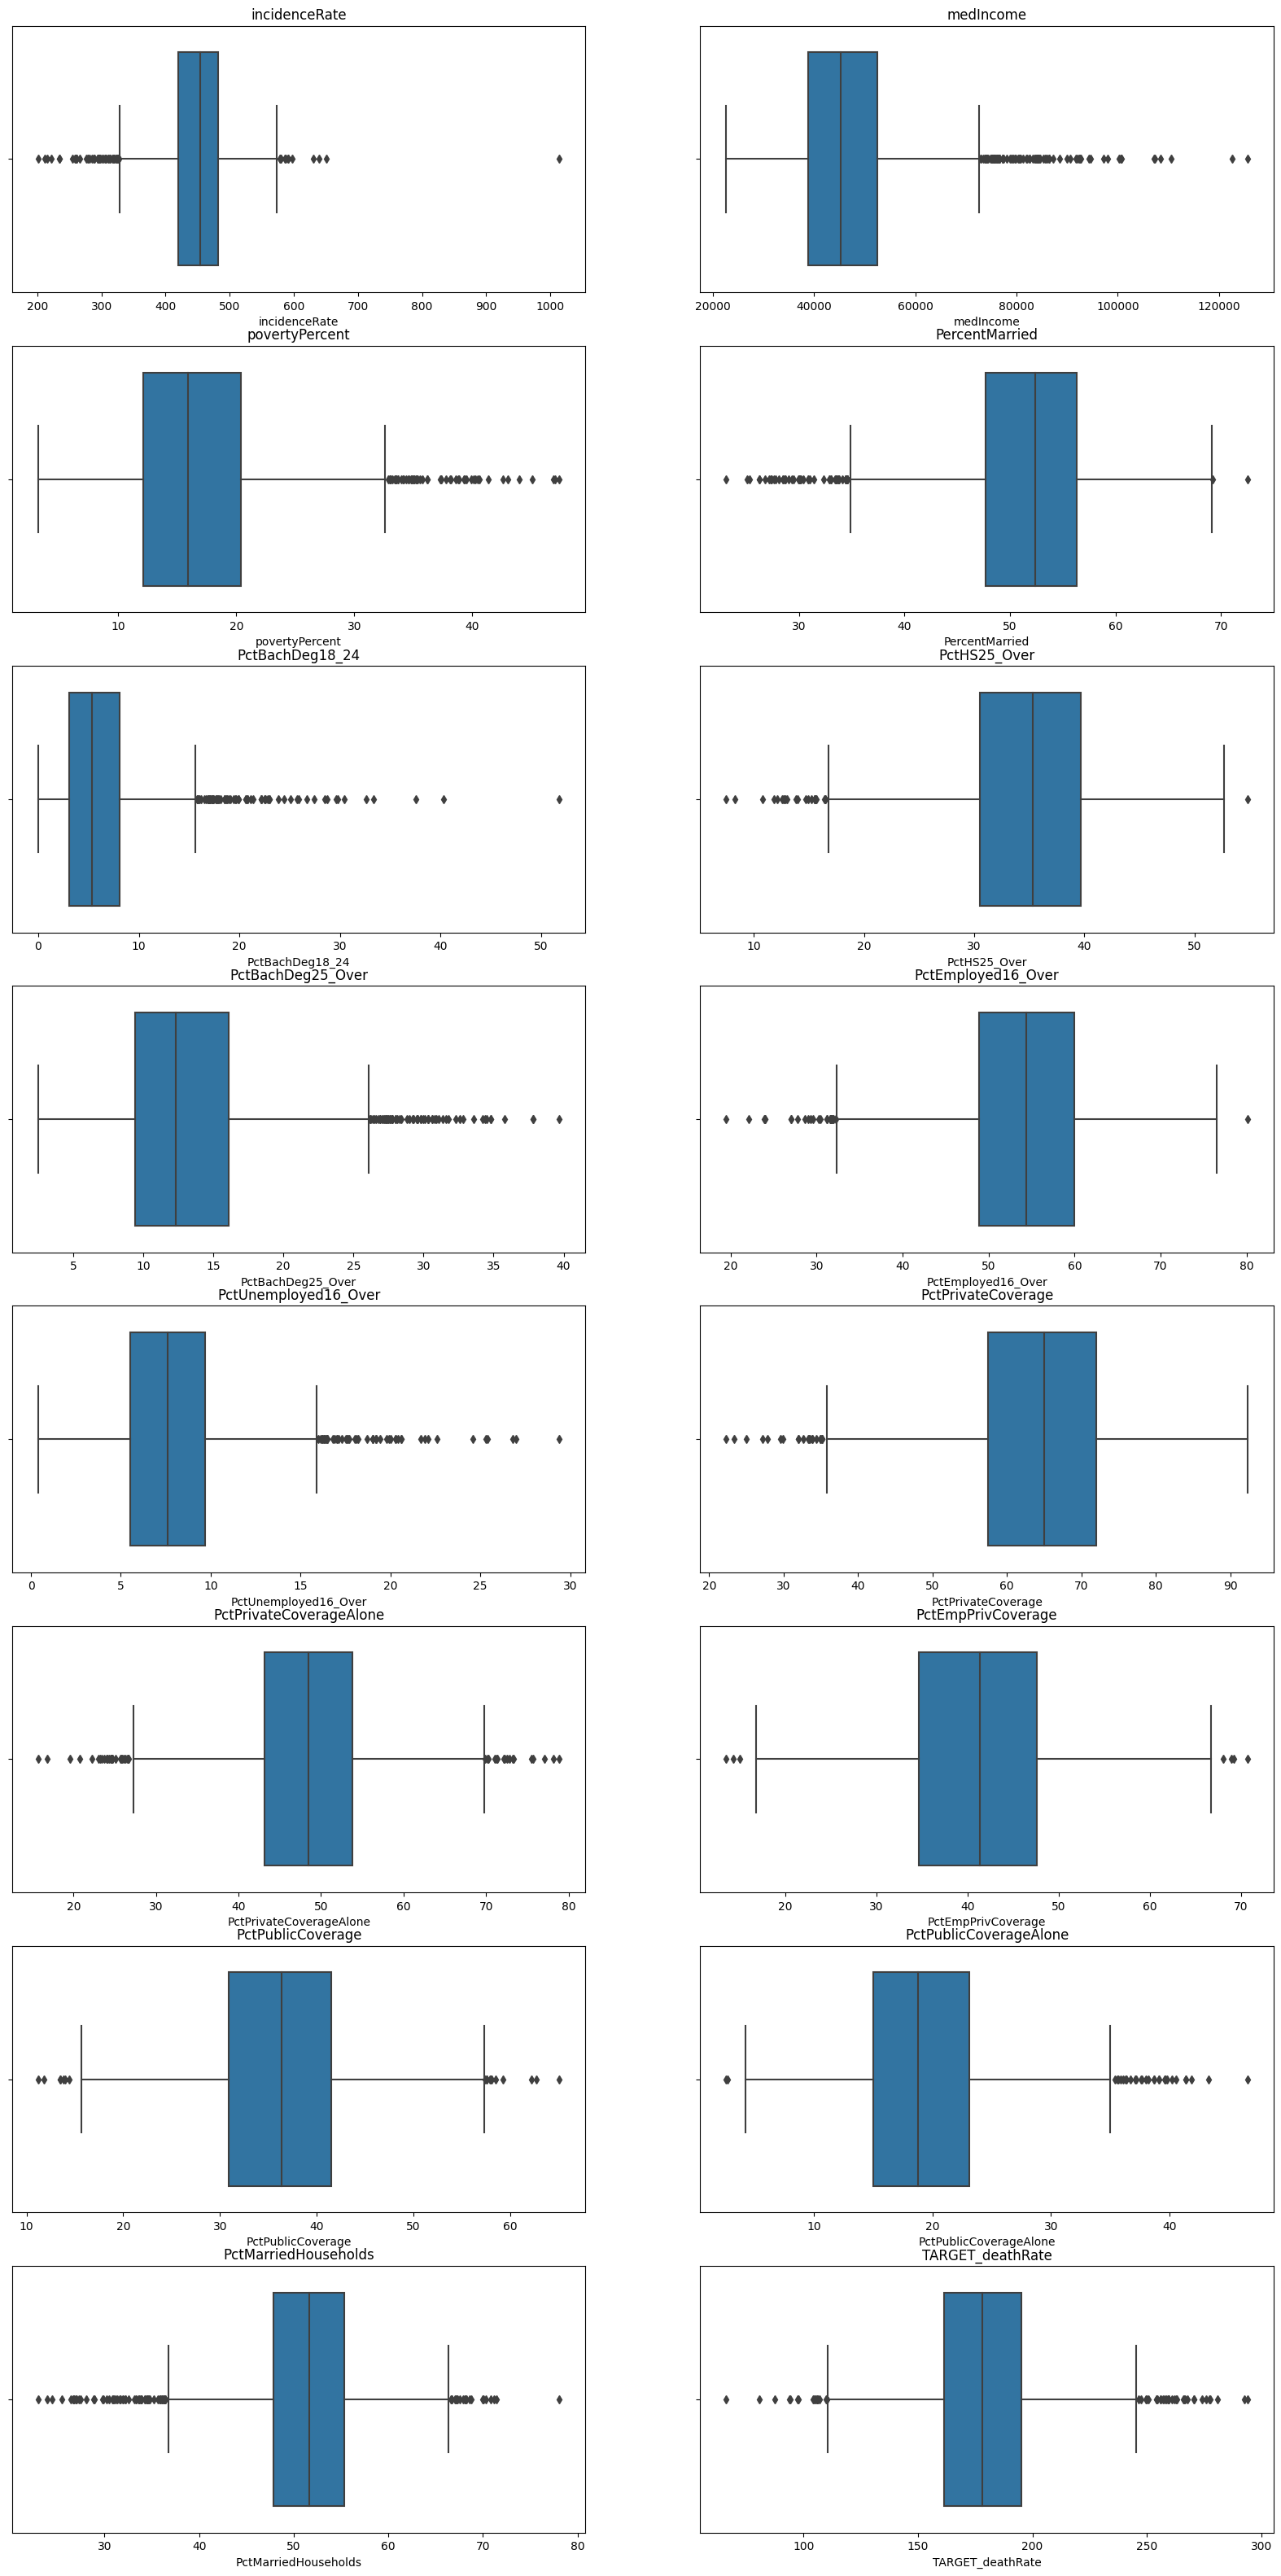

In [11]:
# Create a figure with subplots for each column in the dataframe
fig, axes = plt.subplots(nrows=8, ncols=2, figsize=(20,40))

# Loop through each column and plot a boxplot in the corresponding subplot
for i, col in enumerate(cancer_train_df_clean1.columns):
    ax = axes[i//2, i%2]   # Get the corresponding subplot
    sns.boxplot(x=cancer_train_df_clean1[col], ax=ax) # Plot the boxplot
    ax.set_title(col)      # Set the title of the subplot to the column name


#### 2. There are outliers in atleast half of the columns of the dataframes we selected. To remove them we will use the z-scores relative to the column mean and standard deviation.

In [16]:
# importing stats paclage from scipy library
from scipy import stats

# Calculating the z-scores for each value for every column
z_scores = np.abs(stats.zscore(cancer_train_df_clean1))

# Removing values that have a z-score greater than 3 and checking for each column
cancer_train_df_clean2 = cancer_train_df_clean1[(z_scores < 3).all(axis=1)]

In [17]:
cancer_train_df_clean2.shape

(2260, 16)

cancer_df_clean_train has now less number of rows than before but has ALMOST no outliers. <br>
<b>Note: We do not remove outliers from test set as this is to evaluate the model </b>

#### 3. Create new feature by combining existing features.
As both 'PercentMarried' and 'PctMarriedHouseholds' have less than 0.3 correlation to the target death rate, they can be diffused into one column i.e by taking their ratio

In [18]:
# create a new column which has 'PercentMarried' to 'PctMarriedHouseholds ratio - train set
cancer_train_df_clean2['MarriedHouseholdRatio'] = cancer_train_df_clean2['PercentMarried'] / cancer_train_df_clean2['PctMarriedHouseholds']

# Now drop the original 'PercentMarried' and 'PctMarriedHouseholds' columns
cancer_train_df_clean2 = cancer_train_df_clean2.drop(['PercentMarried', 'PctMarriedHouseholds'], axis=1)
cancer_train_df_clean2.shape

(2260, 15)

In [19]:
# similarly for test set
cancer_test_df_clean['MarriedHouseholdRatio'] = cancer_test_df_clean['PercentMarried'] / cancer_test_df_clean['PctMarriedHouseholds']

cancer_test_df_clean = cancer_test_df_clean.drop(['PercentMarried', 'PctMarriedHouseholds'], axis=1)
cancer_test_df_clean.shape

(609, 15)

#### 4. Scale or normalize the features to ensure they are on a similar scale.

In [20]:
# create train test X,y variables 
X_train = cancer_train_df_clean2.drop('TARGET_deathRate', axis=1)
X_test = cancer_test_df_clean.drop('TARGET_deathRate', axis=1)

y_train = cancer_train_df_clean2['TARGET_deathRate'].values
y_test = cancer_test_df_clean['TARGET_deathRate'].values

In [21]:
# import standard scaler library from scikit learn
from sklearn.preprocessing import StandardScaler

# create a StandardScaler object
scaler = StandardScaler()

# fit and transform the data - X
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### 5. Dimension Reductionality using PCA

In [44]:
# importing PCA from scikit learn library
from sklearn.decomposition import PCA

# Create a PCA object with 12 components as we want to reduce 14 features to 12
pca = PCA(n_components=12)
# Fit and transform the PCA model on X_train scaled
X_train_reduced = pca.fit_transform(X_train_scaled)
# transform X_test scaled
X_test_reduced = pca.transform(X_test_scaled)

### 6. Trying different models to fit our data
#### 1. Linear Regression

In [45]:
#import regression model from scikit learn library 
from sklearn.linear_model import LinearRegression 
reg = LinearRegression()

# fitting regression model 
reg.fit(X_train_reduced, y_train)

LinearRegression()

In [46]:
# importing mean squared error from scikit learn metrics
from sklearn.metrics import mean_squared_error as mse
# Calculating MSE for train set
y_train_pred = reg.predict(X_train_reduced)
print("Linear Regression Train MSE: {:.3f}".format(mse(y_train, y_train_pred, squared=True)))

Linear Regression Train MSE: 330.235


In [47]:
# Calculating MSE for test set
y_test_pred = reg.predict(X_test_reduced)
print("Linear Regression Test MSE: {:.3f}".format(mse(y_test, y_test_pred, squared=True)))

Linear Regression Test MSE: 442.541


In [48]:
# importing altair library
import altair as alt

#plotting the relationship between actual and predicted target line - test set
actual_y_train = alt.Chart(pd.DataFrame({'target': y_test, 'preds': y_test})).mark_line(color='green').encode(
    x='target',
    y='preds'
)

pred_y_train = alt.Chart(pd.DataFrame({'target': y_test, 'preds': y_test_pred})).mark_line(color='orange').encode(
    x='target',
    y='preds'
  )

pred_y_train + actual_y_train

alt.LayerChart(...)

#### 2. Ridge Regression
The Linear regression model is overfitting (train error is less and test error is very large), so to reduce overfitting and handle the multi collinearity between these many features (as seen in the correlation matrix), we will try Ridge Regression.

In [62]:
# importing Ridge regression model from scikit learn library
from sklearn.linear_model import Ridge

# Ridge Regression
alpha_vals = [0.01, 0.1, 1, 10, 100]
train_scores_ridge = []
test_scores_ridge = []

# looping through the list of alpha values
for alpha in alpha_vals: 
    # making object of the regressor for every alpha
    ridge = Ridge(alpha)
    ridge.fit(X_train_reduced,y_train)
    # appending the train & test scores to the list
    train_scores_ridge.append(round(ridge.score(X_train_reduced,y_train),3))
    test_scores_ridge.append(round(ridge.score(X_test_reduced, y_test),3))

print("Ridge test scores for different alpha values", test_scores_ridge)

Ridge test scores for different alpha values [0.458, 0.458, 0.458, 0.458, 0.457]


Text(0.5, 1.0, 'Ridge')

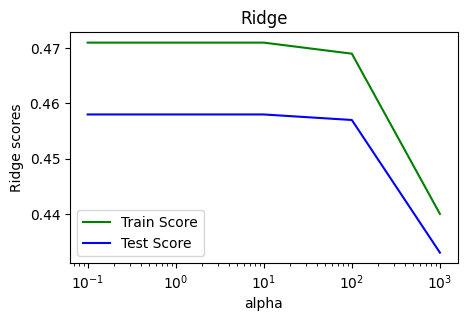

In [57]:
# Plotting train and test ridge scores to see how did the model fit
fig, ax = plt.subplots(figsize= (5, 3))
plt.plot(alpha_vals, train_scores_ridge, c = 'g', label = 'Train Score')
plt.plot(alpha_vals, test_scores_ridge, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 0)
plt.xlabel('alpha')
plt.ylabel('Ridge scores')
plt.title('Ridge')

<b> Best test score is for alpha < 100, apply the value of alpha to make a new model "ridge_best" to calculate MSE </b>

In [69]:
ridge_best = Ridge(alpha=1)
ridge_best.fit(X_train_reduced,y_train)

Ridge(alpha=1)

In [70]:
# Calculating MSE for train set
y_train_pred_ridge = ridge_best.predict(X_train_reduced)
print("Ridge Regression Train MSE: {:.3f}".format(mse(y_train, y_train_pred_ridge)))

Ridge Regression Train MSE: 330.235


In [71]:
# Calculating MSE for test set
y_test_pred_ridge = ridge_best.predict(X_test_reduced)
print("Ridge Regression Test MSE: {:.3f}".format(mse(y_test, y_test_pred_ridge)))

Ridge Regression Test MSE: 442.539


In [72]:
#plotting the relationship between actual and predicted target line - test set
actual_y_train = alt.Chart(pd.DataFrame({'target': y_test, 'preds': y_test})).mark_line(color='green').encode(
    x='target',
    y='preds'
)

pred_y_train = alt.Chart(pd.DataFrame({'target': y_test, 'preds': y_test_pred_ridge})).mark_line(color='orange').encode(
    x='target',
    y='preds'
  )

pred_y_train + actual_y_train

alt.LayerChart(...)

#### 7. Model Comparison

In [73]:
# creating a dictionary to convert it into a dataframe
sum_dict = {'Model_type':['Linear Regression', 'Ridge Regression'], 'MSE on test set':[442.541, 442.539]}
sum_table = pd.DataFrame(sum_dict, columns=['Model_type','MSE on test set'])

In [74]:
sum_table

,Model_type,MSE on test set
0,Linear Regression,442.541
1,Ridge Regression,442.539


### Save the best model

In [75]:
# importing pickle library
import pickle
# choose the filename you want
filename = 'best_model_ridge.sav'
# dump the model
pickle.dump(ridge_best, open(filename, 'wb'))